In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel(r"C:\Users\HAI\Downloads\Decision Tree\Decision Tree\heart_disease.xlsx",sheet_name='Heart_disease')
df = pd.DataFrame(data)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
#Checking the null values
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [4]:
#Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


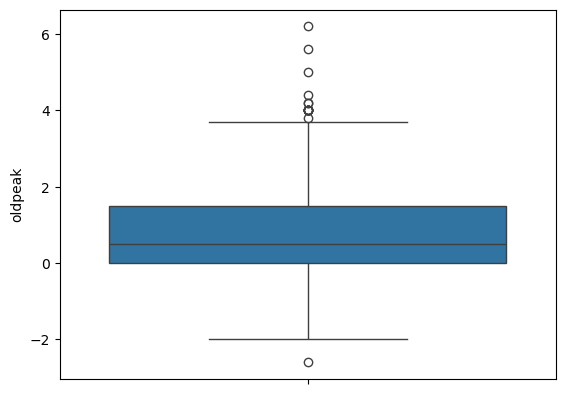

In [5]:
#checking the missing columns as outliers have or not using boxplot
sns.boxplot(df['oldpeak'])
plt.show()

In [6]:
#filling the missing values
numaric = pd.to_numeric(df['oldpeak'],errors = 'coerce')
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [9]:
df['slope'].unique()

from sklearn.preprocessing import OneHotEncoder

In [10]:
ohe = OneHotEncoder()

In [11]:
encoder = ohe.fit_transform(df[['restecg','cp','thal']]).toarray()

In [12]:
encoded_df = pd.DataFrame(encoder,columns=ohe.get_feature_names_out(['restecg', 'cp','thal']))

In [13]:
encoded_df

,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
903,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
904,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
905,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
906,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [14]:
concat_df = pd.concat([df,encoded_df],axis = 1)

In [15]:
concat_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [16]:
concat_df.drop(['restecg','cp','thal'],inplace = True,axis = 1)

In [17]:
concat_df['oldpeak'] = concat_df['oldpeak'].astype(int)

In [18]:
concat_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,Male,145,233,True,150,False,2,downsloping,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,Male,135,203,False,132,False,0,flat,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,Male,140,192,False,148,False,0,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,Male,118,186,False,190,False,0,flat,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,Male,110,201,False,126,True,1,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
concat_df['sex'] = concat_df['sex'].map({'Male':0,'Female':1})

In [20]:
concat_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,0,145,233,True,150,False,2,downsloping,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,0,135,203,False,132,False,0,flat,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,0,140,192,False,148,False,0,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,0,118,186,False,190,False,0,flat,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,0,110,201,False,126,True,1,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
concat_df['fbs'].unique()

array([ True, False])

In [22]:
concat_df['fbs'] = concat_df['fbs'].astype(int)

In [23]:
concat_df.head(10)

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,0,145,233,1,150,False,2,downsloping,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,0,135,203,0,132,False,0,flat,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,0,140,192,0,148,False,0,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,0,118,186,0,190,False,0,flat,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,0,110,201,0,126,True,1,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,66,0,160,228,0,138,False,2,upsloping,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,56,0,130,276,0,128,True,1,upsloping,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,48,0,110,211,0,138,False,0,downsloping,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,57,0,140,260,1,140,False,0,downsloping,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,53,0,155,175,1,160,False,0,upsloping,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [24]:
concat_df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [25]:
replacement_map = {
    True: 'True',
    False: 'False',
    'TURE': 'True',
    'FALSE': 'False'
}
concat_df['exang'] = concat_df['exang'].replace(replacement_map)
print(concat_df['exang'].unique())

['False' 'True']


In [26]:
concat_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,0,145,233,1,150,False,2,downsloping,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,0,135,203,0,132,False,0,flat,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,0,140,192,0,148,False,0,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,0,118,186,0,190,False,0,flat,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,0,110,201,0,126,True,1,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
concat_df['exang'] = concat_df['exang'].map({'False':0,'True':1})

In [28]:
concat_df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect
0,63,0,145,233,1,150,0,2,downsloping,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,41,0,135,203,0,132,0,0,flat,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,57,0,140,192,0,148,0,0,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,52,0,118,186,0,190,0,0,flat,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,57,0,110,201,0,126,1,1,flat,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [30]:
ohe = OneHotEncoder()

In [31]:
encoder = ohe.fit_transform(concat_df[['slope']]).toarray()

In [32]:
df_dataframe = pd.DataFrame(encoder,columns = ohe.get_feature_names_out(['slope']))

In [33]:
df_dataframe

,slope_downsloping,slope_flat,slope_upsloping
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
903,0.0,0.0,1.0
904,0.0,1.0,0.0
905,1.0,0.0,0.0
906,1.0,0.0,0.0


In [34]:
df = pd.concat([concat_df,df_dataframe],axis = 1)

In [35]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,slope,num,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,63,0,145,233,1,150,0,2,downsloping,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,0,135,203,0,132,0,0,flat,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,57,0,140,192,0,148,0,0,flat,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,52,0,118,186,0,190,0,0,flat,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,110,201,0,126,1,1,flat,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
df.drop('slope',axis = 1,inplace = True)

In [37]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,restecg_lv hypertrophy,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,63,0,145,233,1,150,0,2,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,41,0,135,203,0,132,0,0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,57,0,140,192,0,148,0,0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,52,0,118,186,0,190,0,0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,57,0,110,201,0,126,1,1,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


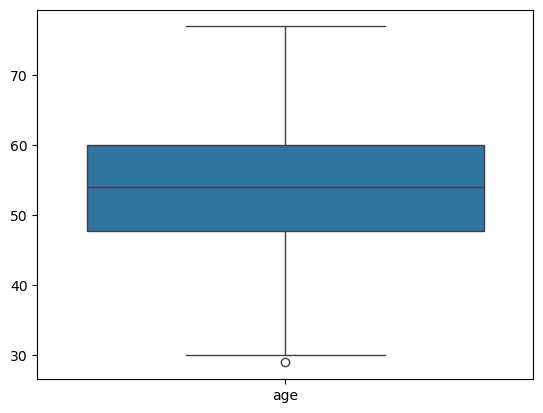

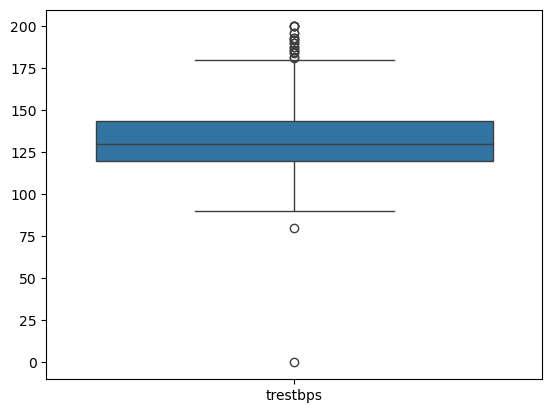

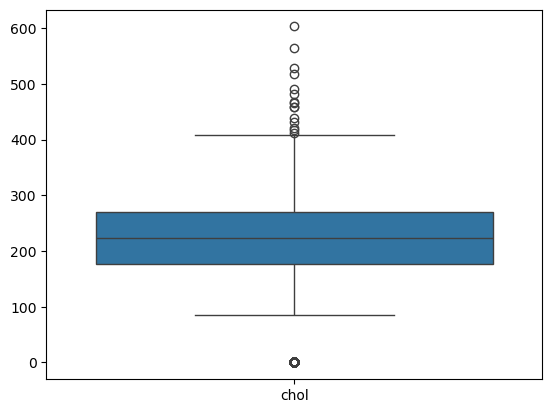

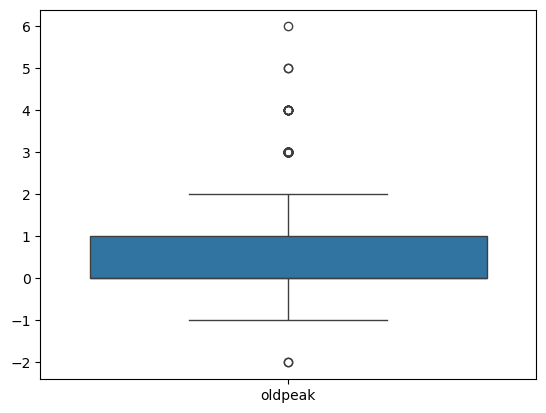

In [38]:
columns = ['age','trestbps','chol','oldpeak']
for col in columns:
    sns.boxplot(df[[col]])
    plt.show()

In [39]:
columns = ['age','trestbps','chol','oldpeak','num']
print(columns,":",df[columns].skew())

['age', 'trestbps', 'chol', 'oldpeak', 'num'] : age        -0.136797
trestbps    0.353650
chol       -0.564766
oldpeak     1.412316
num         0.951409
dtype: float64


In [40]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler

In [41]:
rs = RobustScaler()

In [42]:
df[['age','trestbps','chol','oldpeak']] = rs.fit_transform(df[['age','trestbps','chol','oldpeak']])

In [43]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,restecg_lv hypertrophy,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,0.734694,0,0.625000,0.096515,1,150,0,2.0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.061224,0,0.208333,-0.225201,0,132,0,0.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.244898,0,0.416667,-0.343164,0,148,0,0.0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.163265,0,-0.500000,-0.407507,0,190,0,0.0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.244898,0,-0.833333,-0.246649,0,126,1,1.0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [44]:
mms = MinMaxScaler()

In [45]:
df['thalch'] = mms.fit_transform(df[['thalch']])

In [46]:
df.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,restecg_lv hypertrophy,...,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping
0,0.734694,0,0.625000,0.096515,1,0.633803,0,2.0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,-1.061224,0,0.208333,-0.225201,0,0.507042,0,0.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.244898,0,0.416667,-0.343164,0,0.619718,0,0.0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.163265,0,-0.500000,-0.407507,0,0.915493,0,0.0,0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.244898,0,-0.833333,-0.246649,0,0.464789,1,1.0,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [47]:
df['num'].unique()

array([0, 1, 2, 3, 4])

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [55]:
x = df.drop('fbs',axis = 1)
y = df['fbs']

In [56]:
x.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalch', 'exang', 'oldpeak', 'num',
       'restecg_lv hypertrophy', 'restecg_normal', 'restecg_st-t abnormality',
       'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'thal_fixed defect', 'thal_normal',
       'thal_reversable defect', 'slope_downsloping', 'slope_flat',
       'slope_upsloping'],
      dtype='object')

In [57]:
print(y)

0      1
1      0
2      0
3      0
4      0
      ..
903    0
904    0
905    0
906    1
907    1
Name: fbs, Length: 908, dtype: int64


In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [59]:
model = DecisionTreeClassifier(random_state = 42)

In [60]:
print(model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


In [61]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,5,7],
    'min_samples_split': [2,4],
    'min_samples_leaf': [1,2]
}

In [62]:
grid_search_tree = GridSearchCV(model, param_grid, cv=5, n_jobs=-1,verbose=2)
grid_search_tree.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4]},
             verbose=2)

In [63]:
print("Best Parameters:", grid_search_tree.best_params_)
print("Best Score:", grid_search_tree.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.7700047236655646


In [64]:
grid_search_tree.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [68]:
from sklearn.metrics import confusion_matrix
y_pred = grid_search_tree.predict(x_test)

In [69]:
confusion_matrix = confusion_matrix(y_pred,y_test)
print(confusion_matrix)

[[148  31]
 [  1   2]]


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       149
           1       0.67      0.06      0.11        33

    accuracy                           0.82       182
   macro avg       0.75      0.53      0.51       182
weighted avg       0.80      0.82      0.76       182



In [ ]:
#Interviwe Question

---> The Common Hyperparameters of Decision Tree
1.max_depth - The Maximum Number of Levels(depth)the tree Can grow.
              Small max_depth --> simple tree(underfitting) they miss important patterns
              Large max_depth --> complex tree(overfitting) may memorize training data.

2.min_samples_split - Minimum number of samples required to split a node.
                  Small = more splits, complex tree (overfitting)
                  Large = fewer splits, simple tree (underfitting)

3.min_samples_leaf - Minimum samples needed in a leaf (end node).
                    Small = very specific leaves (overfitting)
                    Large = smoother, more general tree (better generalization)

4.max_features - Number of features to consider at each split.
                Small = less complex tree
                Large = more complex tree

5.criterion - Just changes how the tree decides the best question.
               the split can choose the 'gini','entropy' etc...

In [ ]:
------>What is the difference between the Label encoding and One-hot encoding?

Label Encoding → Each category becomes a number.like(0,1,2,3....)
*Label Encodeing we can used the Target Column and Feature Column
*Label Enocodeing aplied.the dataset will be not always binary formate.

One-Hot Encoding → Each category becomes a separate column
*The One-Hot Encoder we can saparated each column into the binary formate like 0/1.
*The one-Hot Encoder is alwayes binary formate only.